In [1]:
# https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial
# http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline

/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
plot_correlation_map(train)

NameError: name 'plot_correlation_map' is not defined

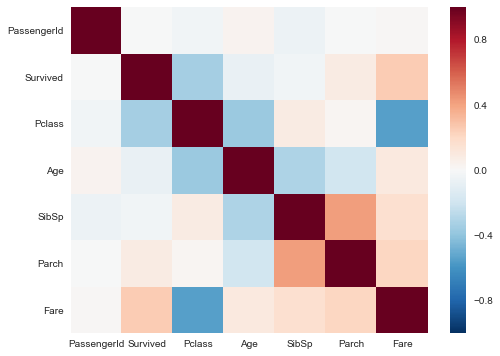

In [40]:
corr_train = train.corr()
fig, ax = plt.subplots(figsize=(8,6))       
sns.heatmap(corr_train, 
            xticklabels=corr_train.columns.values,
            yticklabels=corr_train.columns.values)

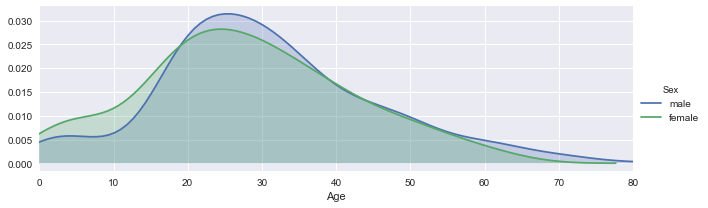

In [41]:
# FacetGridを使うと、複数のカーネル密度推定のグラフを1つのプロットに描くことができる。

# 性別で層別化して、グラフを少し横長に設定します。
fig = sns.FacetGrid(train, hue="Sex",aspect=3)

# mapを使って、性別ごとにkdeplotを描くようにします。
fig.map(sns.kdeplot,'Age',shade= True)

# xの最大値を長老に合わせます。
oldest = train['Age'].max()

# x軸の範囲を設定します。
fig.set(xlim=(0,oldest))

# 凡例を付け加えておきましょう。
fig.add_legend()

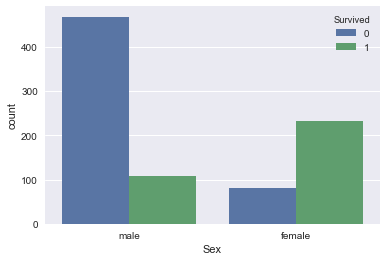

In [42]:
sns.countplot('Sex', data=train, hue='Survived')

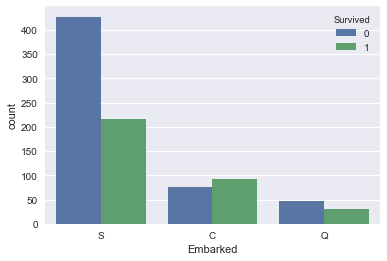

In [43]:
sns.countplot('Embarked', data=train, hue='Survived')

In [44]:
#Sex mapping 
train['Sex'] = train['Sex'].map({"male":0, "female":1})
test['Sex'] = test['Sex'].map({"male":0, "female":1})

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [47]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
#Create dataset 
imputed = pd.DataFrame()

imputed['Age'] = train.Age.fillna(train.Age.mean())
imputed[ 'Fare' ] = train.Fare.fillna( train.Fare.mean() )

imputed.head()




,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


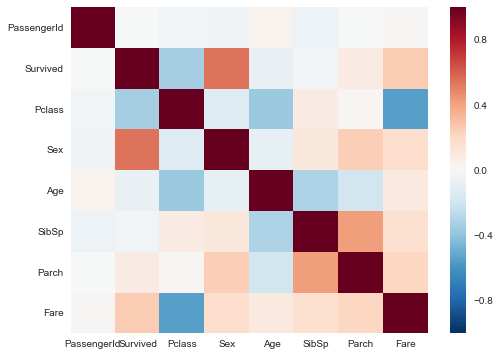

In [52]:
corr_train = train.corr()
fig, ax = plt.subplots(figsize=(8,6))       
sns.heatmap(corr_train, 
            xticklabels=corr_train.columns.values,
            yticklabels=corr_train.columns.values)

In [53]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

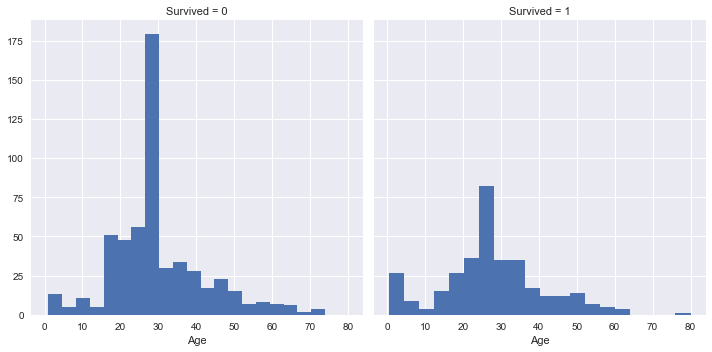

In [62]:
g = sns.FacetGrid(train, col='Survived', size=5)
g.map(plt.hist, 'Age', bins=20)

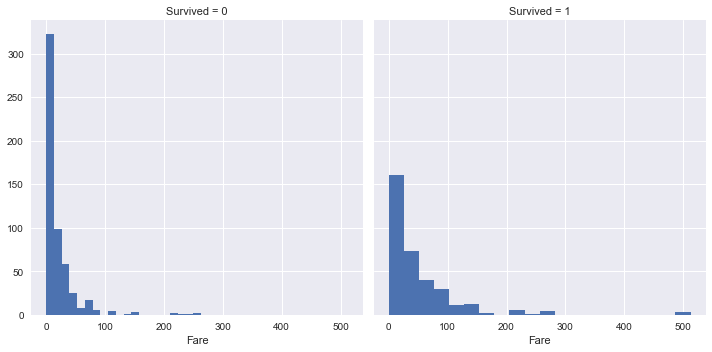

In [63]:
#年齢層によってどの程度の生存率かをグラフにしたいナーーー今度ね。

g2 = sns.FacetGrid(train, col='Survived', size=5)
g2.map(plt.hist, 'Fare', bins=20)

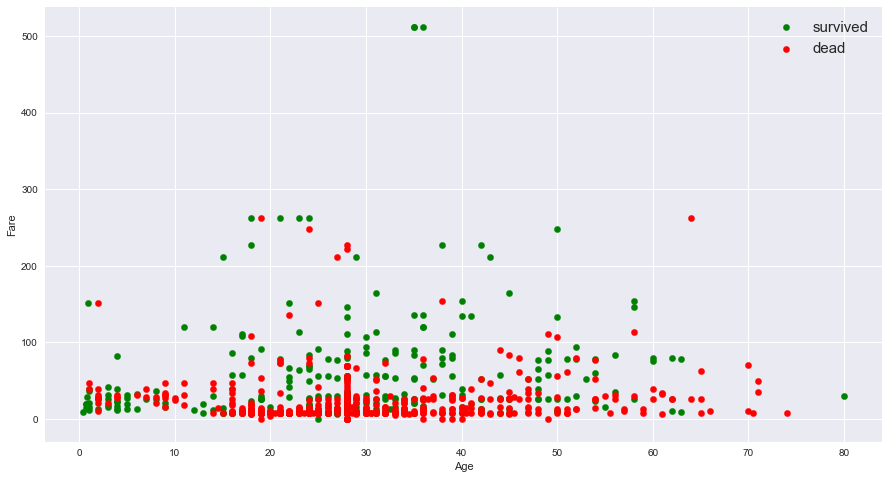

In [68]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train[train['Survived']==1]['Age'],train[train['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(train[train['Survived']==0]['Age'],train[train['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)